# Contradictory, My Dear Watson

Bu projede, cümle çiftlerini (bir öncül ve bir hipotezden oluşan) üç kategoriye ayırıyoruz: 
- gerektirme
- çelişki 
- nötr

Projede kullanılan veriler [buradan](https://www.kaggle.com/c/contradictory-my-dear-watson/data) temin edilmiştir.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


<Axes: xlabel='count', ylabel='language'>

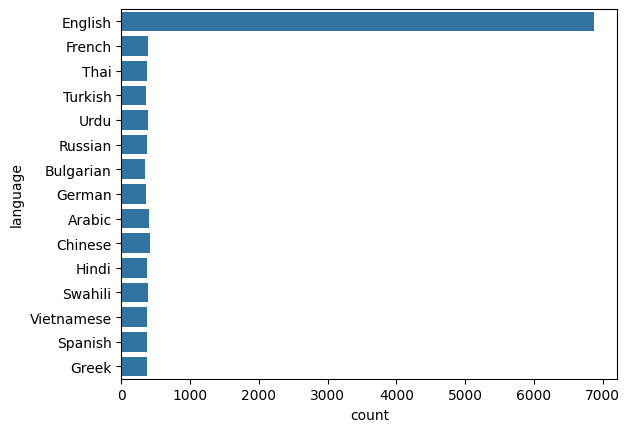

In [5]:
sns.countplot(df["language"])

In [6]:
df["language"].value_counts()

language
English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: count, dtype: int64

In [8]:
df[df["lang_abv"]=="tr"]

,id,premise,hypothesis,lang_abv,language,label
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
43,43b978ef75,Diğerleri tüketiciyi yeterince mutlu etmiyor.,Diğerleri yeterlidir.,tr,Turkish,2
236,68c98548f9,Dar Chignecto Isthmus ile Nova Scotia'ya bağlı...,New Brunswick 1784'de bir eyaletti.,tr,Turkish,0
237,c34e3c518b,"ve şey, sanırım maaş ve uzun vadede itibar kon...",Nihayetinde biz de benzer maaş seçenekleri sun...,tr,Turkish,0
298,8232253cb8,Bu yılın mezun öğlen yemeği AMRA Yıllık Buluşm...,AMRA Yıllık Toplantısı her yıl Nashville'de ge...,tr,Turkish,1
...,...,...,...,...,...,...
11847,606ed9a581,Önerdiğimiz şeylerin esası hakkında ulusal bir...,Bu konuyu tartışmanın bir anlamı yok.,tr,Turkish,2
11926,542863c758,Nathaniel Hawthorne'un Yedi Çatılı Ev adlı ese...,Görmek için daha fazla manzara var.,tr,Turkish,0
12024,d42c6365d4,McKim Mead tarafından tasarlanan villayı görme...,Malikaneyi inşa etmek 2 milyon dolara mal oldu.,tr,Turkish,1
12030,cc826660fd,"Evet--yalanların pazarlığı, şüphe kötüdür, san...",Bilgi olmadan topladığım tüm kanıtlar sayesind...,tr,Turkish,1


In [9]:
test=pd.read_csv("test.csv")
test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [10]:
test["language"].value_counts()

language
English       2945
Spanish        175
Russian        172
Swahili        172
Urdu           168
Greek          168
Turkish        167
Thai           164
Arabic         159
French         157
German         152
Chinese        151
Hindi          150
Bulgarian      150
Vietnamese     145
Name: count, dtype: int64

In [11]:
def clean_text(text):
    # 1- Küçük harfe çevir
    text=text.str.lower()
    # 2 - Noktalama işaretlerini kaldır
    text=text.str.replace('[^\w\s]', '', regex=True)
    # 3 - Rakamları kaldır
    text=text.str.replace('\d+', '', regex=True)
    # 4 - Satır sonu karakterlerini kaldır (^t, ^p)
    text=text.str.replace('\n', '', regex=True)
    text=text.str.replace('\r', '', regex=True)
    return text

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vect=CountVectorizer(max_features=1000)

In [14]:
df["premise"]=clean_text(df["premise"])
df["hypothesis"]=clean_text(df["hypothesis"])

In [15]:
df.sample(10)

,id,premise,hypothesis,lang_abv,language,label
610,b236b2a8a6,cruises are available from the bhansi ghat whi...,you can take a cruise from bhansi ghat,en,English,0
8363,6292578f6d,رؤية ذلك موضوع لي,يجب أن يتحكم بها شخص ما,ar,Arabic,0
10753,d86615084a,กจกรรมหรออวยวะทางเพศหรอการขบถาย,กจกรรมบางอยางขบเลอดออก,th,Thai,1
9558,a2addeb9ce,寻找艾米莉狄金森后来的诗歌有关这首诗我想了解的一切都在微软上找到了,迪肯森写了关于爱情的诗,zh,Chinese,1
4744,76d15f6ddf,cuando llegó a los sesenta años en skeat dio ...,cuando skeat cumplió los sesenta no dio señale...,es,Spanish,2
9916,67c3e4c30a,many restaurants and cafes welcome children,children are not welcome in any of the restaur...,en,English,2
11155,9bfb10bc3f,ويخضع مدخل الفندق لحراسة برجين يعود تاريخهما إ...,تم بناء البرجين بالحجر الجيري,ar,Arabic,1
8907,2ec4d9733b,he hadnt seen even pictures of such things sin...,he used to watch silent movies every saturday,en,English,1
8569,ea97fbe3be,see the idea then you think tuppence paused t...,mr carter had no energy left to continue the c...,en,English,1
4582,94acd3619c,центральное финансовое управление изучило исто...,центральное финансовое управление подтвердило ...,ru,Russian,2


In [41]:
x1=np.array(df["premise"])
x2=np.array(df["hypothesis"])
y=np.array(df["label"])

In [42]:
x1=vect.fit_transform(x1)
x2=vect.fit_transform(x2)

In [43]:
x1.shape, x2.shape, y.shape

((12120, 1000), (12120, 1000), (12120,))

In [44]:
from scipy import sparse
x=sparse.hstack([x1,x2])
x.shape

(12120, 2000)

## Modelleme

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

l = LogisticRegression()
kn= KNeighborsClassifier()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
ab = AdaBoostClassifier()
gb= GradientBoostingClassifier()
m = MultinomialNB()
b = BernoulliNB()

modeller=[l, kn, d, r, ab, gb, m, b]
isimler=["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", 
         "AdaBoostClassifier", "GradientBoostingClassifier", "MultinomialNB", "BernoulliNB"]

def algo_test(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train, y_train)
        tahmin=model.predict(x_test) # if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average='micro'))
        recall.append(recall_score(y_test, tahmin, average='micro'))
        f1.append(f1_score(y_test, tahmin, average='micro'))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [45]:
algo_test(x,y)

En başarılı model:  GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.77      0.41      0.53      1606
           1       0.24      0.43      0.31       428
           2       0.30      0.63      0.41       390

    accuracy                           0.45      2424
   macro avg       0.44      0.49      0.42      2424
weighted avg       0.60      0.45      0.47      2424



,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.447607,0.447607,0.447607,0.447607
AdaBoostClassifier,0.435231,0.435231,0.435231,0.435231
LogisticRegression,0.393564,0.393564,0.393564,0.393564
BernoulliNB,0.380363,0.380363,0.380363,0.380363
MultinomialNB,0.375825,0.375825,0.375825,0.375825
DecisionTreeClassifier,0.373762,0.373762,0.373762,0.373762
RandomForestClassifier,0.372525,0.372525,0.372525,0.372525
KNeighborsClassifier,0.313531,0.313531,0.313531,0.313531


## Sonuç

Cümle çiftlerini (bir öncül ve bir hipotezden oluşan) gerektirme, çelişki veya nötr olmak üzere üç kategoriye ayırdığımız bu projede makine öğrenmesi modelleri kullanılmış ancak beklenen başarı elde edilememiştir. 